### CIFAR-10 Object Recognition in Images using Convolutional Neural Networks

In this notebook, we will train a Convolutional Neural Network (CNN) to classify images from the CIFAR-10 dataset. The CIFAR-10 dataset consists of 60000 32x32 colour images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images. The dataset can be downloaded from [Kaggle](
https://www.kaggle.com/c/cifar-10/).


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras

In [2]:
# Load the CIFAR-10 dataset
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [3]:
# Get the shapes and sizes of the datasets
print("x_train shape:", x_train.shape)
print("y_train shape:", y_train.shape)
print("x_test shape:", x_test.shape)
print("y_test shape:", y_test.shape)

x_train shape: (50000, 32, 32, 3)
y_train shape: (50000, 1)
x_test shape: (10000, 32, 32, 3)
y_test shape: (10000, 1)


50,000 training images and 10,000 test images are provided in the dataset. The images are divided into 10 classes. The 10 different classes represent airplanes, cars, birds, cats, deer, dogs, frogs, horses, ships, and trucks. The images are 32x32 pixels in size and are RGB.

10,000 test images are provided in the dataset.

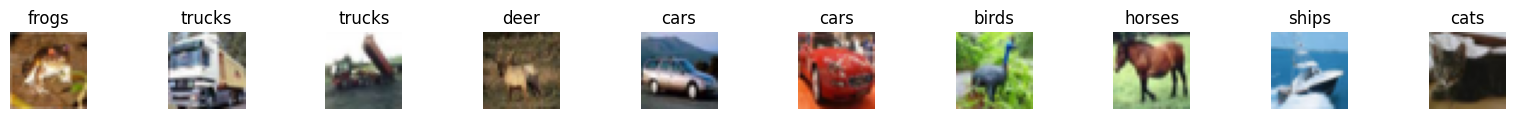

In [4]:
# Map the label to the class name
class_names = ['airplanes', 'cars', 'birds', 'cats', 'deer', 'dogs', 'frogs', 'horses', 'ships', 'trucks']
# visualize the first 10 images
plt.figure(figsize=(20, 1))
for i in range(10):
    plt.subplot(1, 10, i+1)
    plt.imshow(x_train[i])
    plt.title(class_names[y_train[i, 0]])
    plt.axis("off")
plt.show()

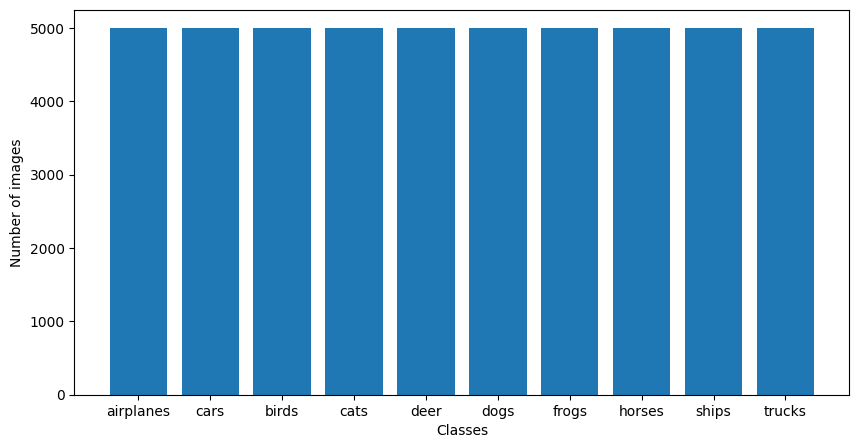

In [5]:
# Number of images in each class
unique, counts = np.unique(y_train, return_counts=True)
# plot the number of images in each class
plt.figure(figsize=(10, 5))
plt.bar(class_names, counts)
plt.xlabel('Classes')
plt.ylabel('Number of images')
plt.show()

In [6]:
# Scale the pixel values of the images to the 0 to 1 range
x_train = x_train / 255.0
x_test = x_test / 255.0
print("x_train shape:", x_train.shape)
print("x_test shape:", x_test.shape)

x_train shape: (50000, 32, 32, 3)
x_test shape: (10000, 32, 32, 3)


In [7]:
# # create a cnn model for CIFAR-10
model = keras.Sequential([
    keras.layers.Input(shape=(32, 32, 3)),
    keras.layers.Conv2D(32, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.MaxPooling2D((2, 2)),
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    keras.layers.Flatten(),
    keras.layers.Dense(64, activation='relu'),
    keras.layers.Dense(10)
])
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 30, 30, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 15, 15, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 13, 13, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 6, 6, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 4, 4, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │        65,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 122,570 (478.79 KB)

 Trainable params: 122,570 (478.79 KB)

 Non-trainable params: 0 (0.00 B)

In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
history = model.fit(x_train, y_train, epochs=20, validation_data=(x_test, y_test))

Epoch 1/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 14ms/step - accuracy: 0.3444 - loss: 1.7720 - val_accuracy: 0.5358 - val_loss: 1.2814
Epoch 2/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.5624 - loss: 1.2299 - val_accuracy: 0.5736 - val_loss: 1.1892
Epoch 3/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.6311 - loss: 1.0450 - val_accuracy: 0.6419 - val_loss: 1.0210
Epoch 4/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.6750 - loss: 0.9282 - val_accuracy: 0.6630 - val_loss: 0.9551
Epoch 5/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7040 - loss: 0.8394 - val_accuracy: 0.6660 - val_loss: 0.9615
Epoch 6/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 24s 15ms/step - accuracy: 0.7223 - loss: 0.7918 - val_accuracy: 0.6890 - val_loss: 0.9048
Epoch 7/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 23s 15ms/step - accuracy: 0.7446 - loss: 0.7283 - val_accuracy: 0.6921 - val_loss: 0.8965
Epoch 8/20
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7590 -

313/313 - 2s - 7ms/step - accuracy: 0.6946 - loss: 1.1242
0.694599986076355


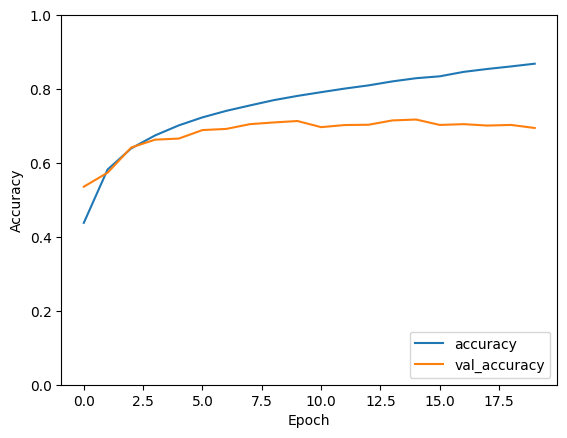

In [9]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(x_test, y_test, verbose=2)
print(test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 7ms/step


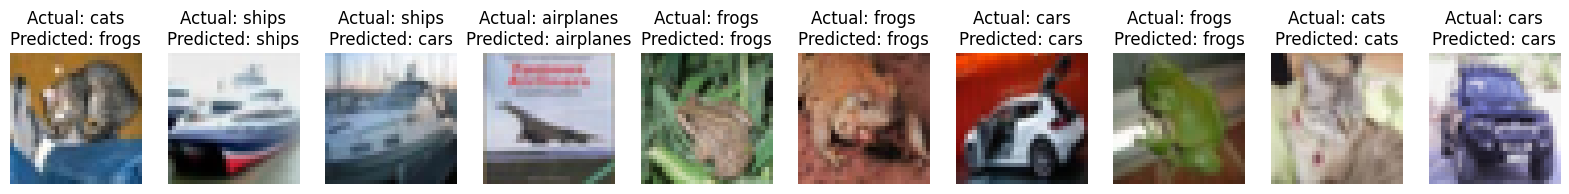

In [10]:
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])
predictions = probability_model.predict(x_test)

# Plot the first 10 prediction image and its label, and the predicted label
plt.figure(figsize=(20, 3))
for i in range(10):
    plt.subplot(1, 10, i + 1)
    plt.imshow(x_test[i])
    plt.title(f"Actual: {class_names[y_test[i][0]]}\nPredicted: {class_names[np.argmax(predictions[i])]}")
    plt.axis('off')
plt.show()